### Normal Distribution

$\mathcal{L}(\mu, \sigma) = -\frac{n}{2} log(2 \pi \sigma ^2) - \frac{1}{2 \sigma ^ 2} (y-X\beta)'(y-X\beta)$

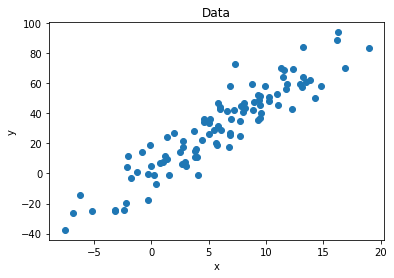

In [1]:
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([3,5])
sigma = np.sqrt(10)

# Generate the data from the true model
x=np.vstack([np.ones([100,]),np.random.normal(loc=5, scale=5, size=100)]).T
epsilon = np.random.normal(loc=0, scale=sigma**2, size=100) # epsilon ~ N(0,sigma^2)
y= np.dot(x,beta) + epsilon

# Plot the data
plt.scatter(x[:,1], y)
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$\theta = (\beta, \sigma)'$

In [2]:
# Likelihood function
from log_likelihood import log_likelihood

In [3]:
# Directly maximizing the likelihood function

theta = np.append(beta,sigma)
import scipy.optimize as op
objective = lambda theta: -log_likelihood(theta, y, x)
result = op.minimize(objective, theta)
res=result["x"]

beta_hat1 = res[0:-1]
sigma_hat1 = res[-1] 

$\hat\beta$ should be equal to $(x'x)^{-1}x'y$

$\hat\sigma^2$ should be equal to $\frac{1}{n}(y-x\beta)'(y-x\beta)$

In [4]:
beta_hat2 = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y) # (X'X)^-1 (X'y)

print(beta_hat1, beta_hat2)

[ 3.08722232  4.67332241] [ 3.08723099  4.67332156]


In [5]:
sigma_hat2 = np.sqrt((1/x.shape[0]) * np.dot((y-np.dot(x,beta_hat2)).T,(y-np.dot(x,beta_hat2)))) # (1/n)(y-Xb)'(y-Xb)

print(sigma_hat1, sigma_hat2)

10.5951970331 10.5951945414


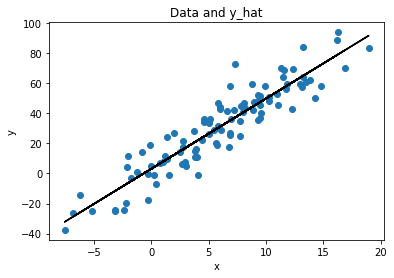

In [6]:
y_hat = np.dot(x,beta_hat1)

#Plot
plt.scatter(x[:,1], y)
plt.plot(x[:,1], y_hat,'k')
plt.title('Data and y_hat')
plt.xlabel('x')
plt.ylabel('y')
plt.show()